# _Genetics Coding Challenge_
## Cameron S. Goldbeck

Context: Biomarker research for cancer focuses on identifying clusters of genetically similar patients and
identifying similarities of those clusters.

Goal: Identify potential genes associated with tumor cells and clusters of patients with these tumors.

## Question 1:

Which ten genes have the greatest increase in expression (upregulated) in tumors compared to normal tissue, and which ten genes are the most downregulated? How did you identify these genes?

In [1]:
#  Let read in the data
import pandas as pd

df = pd.read_csv('GeneExpressionData.csv', index_col=0)
df.head()

,normal_1,tumor_1,normal_2,tumor_2,tumor_3,normal_3,tumor_4,normal_4,tumor_5,normal_5,...,tumor_105,normal_105,tumor_106,normal_106,normal_107,tumor_107,normal_108,tumor_108,tumor_109,normal_109
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,154.4730,43.0714,109.3484,94.7577,74.5163,15.7841,302.9294,19.0722,158.4936,51.0438,...,118.2891,31.0196,99.9529,12.4398,31.2605,117.1834,12.4471,147.7994,147.8012,9.8242
A2M,40198.2063,9467.7956,32634.9299,5353.4476,11410.8522,44700.9521,12326.7286,41867.0567,3536.4069,28438.4017,...,12156.3877,36859.9223,8412.4951,38299.6228,43016.5913,2875.5689,28054.7619,13538.5436,18412.5602,18552.5388
NAT1,1063.8095,82.3799,1613.1641,16008.1120,207.9045,77.9022,5070.2175,80.9278,324.2102,216.2162,...,15707.7250,1019.2726,1574.1796,83.8684,96.7337,78.9787,171.5776,1360.5530,330.9906,17.0631
NAT2,12.6984,1.3560,32.7221,256.8799,6.9988,3.0550,6.5140,0.0000,1.2211,0.4660,...,2.5728,1.8651,1.3653,1.2039,2.5126,4.4406,0.7729,3.8579,1.0040,0.0000
SERPINA3,51733.6508,20979.0660,8618.3357,10283.9199,151.0910,347.7597,44646.4221,722.6804,40965.8839,16592.2647,...,23761.7547,4613.3043,5714.0809,99.1172,1772.1943,400.6026,646.5076,10343.9961,2462.5167,91.0031


In [2]:
#  Create new data set that only contains the ratio in RNA expression between tumor and normal neighbor cells
#  We add 1 to all values so that we do not run into problems dividing by zero
dfr = df.add(1)
dfr = dfr.filter(regex='tumor') / dfr.filter(regex='normal').values
dfr.columns = dfr.columns.str.replace("tumor", "ratio")
dfr.head()

,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,ratio_6,ratio_7,ratio_8,ratio_9,ratio_10,...,ratio_100,ratio_101,ratio_102,ratio_103,ratio_104,ratio_105,ratio_106,ratio_107,ratio_108,ratio_109
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.283467,0.867776,4.499276,15.141808,3.064603,2.734375,3.385703,8.519863,0.371086,1.359965,...,2.400826,3.707381,1.757826,1.848567,5.845519,3.725503,7.511488,3.663409,11.065538,13.747085
A2M,0.235547,0.164066,0.255288,0.294442,0.124384,0.097752,0.431413,0.101838,0.126669,0.387669,...,0.448844,0.685827,0.179652,0.459350,0.078417,0.329818,0.219670,0.066870,0.482594,0.992455
NAT1,0.078305,9.917896,2.647638,61.898617,1.497173,0.049906,41.668685,278.447981,2.343169,2.329738,...,74.943502,20.131194,13.938423,5.130373,309.128254,15.396596,18.560260,0.818333,7.889512,18.379492
NAT2,0.171991,7.647208,1.972577,7.514000,1.515075,0.224128,0.480108,42.972200,0.638558,0.382219,...,22.332762,3.559483,1.145698,1.405957,25.545619,1.247007,1.073234,1.548881,2.740087,2.004000
SERPINA3,0.405532,1.193238,0.436091,61.694944,2.468886,0.373207,15.450034,374.473865,0.344491,2.948555,...,16.752944,0.907541,18.101180,4.493347,497.422719,5.149802,57.083907,0.226485,15.976640,26.776453


In [3]:
#  Store average ratio of regulation between two cell types
avg_change = dfr.mean(axis=1)

In [4]:
print('Genes with the largest upregulated expression: \n', avg_change.nlargest(10))
print('\n')
print('Genes with the largest downregulated expression: \n', avg_change.nsmallest(10))

Genes with the largest upregulated expression: 
 gene
DCD        2276.101360
MUCL1      1906.282578
PIP        1639.184125
CLEC3A     1047.212280
S100A7      866.069922
CPB1        810.516785
PIGR        533.019702
AGR2        420.570019
MMP1        409.508486
COL10A1     398.532027
dtype: float64


Genes with the largest downregulated expression: 
 gene
FIGF       0.069709
C2orf40    0.071729
SCARA5     0.087208
ABCA10     0.090144
CA4        0.093453
ANGPTL7    0.094712
FXYD1      0.094957
CD300LG    0.096409
SDPR       0.099715
CXCL2      0.106611
dtype: float64


### Answer 1:

Looking at the output above we can see the genes with the largest and smallest average ratio of rna expression between tumor cells and normal cells. Those with the largest values (and greater than 1) have the highest upregulated expression while those with the smallest values (and less than 1) have the highest downregulated expression. We could further do statistical tests of significance for the averages (testing against being equal to 1) and find p-values/confidence intervals. While this would give additional rigor and insight, the extreme values presented above (i.e. far from 1) and decent sample size (n=109) suggests there is statistical significance to all results presented above.

## Question 2:

Identify what type of tumor this data comes from: breast cancer or sarcoma?

In [5]:
print("Genes with breast cancer mutations from 'TCGA-BRCA': ", '\n', avg_change[['GATA3', 'PIK3CA', 'MAP3K1']])
print('\n')
print("Genes with breast cancer mutations from 'TCGA-SARC': ", '\n', avg_change[['TP53', 'ATRX', 'RB1']])

Genes with breast cancer mutations from 'TCGA-BRCA':  
 gene
GATA3     12.899793
PIK3CA     0.800743
MAP3K1     1.553996
dtype: float64


Genes with breast cancer mutations from 'TCGA-SARC':  
 gene
TP53    1.281730
ATRX    0.964861
RB1     0.988136
dtype: float64


### Answer 2:

It appears that the data provided comes from breast cancer. I arrived at this solution via two paths. Quickly skimming the abstracts of the two papers, each lists a few genes associated with breast cancer or sarcoma. Above I have listed the average rna expression ratio between tumor and normal cells for these genes. Right away we noitce GATA3 has significant upregulated expression. While none of the other two genes seem significant, none of the sarcoma genes are either. 

Additionally, since none of the six genes mentioned in the two abtracts had the largest up or down regulated expression, I did a quick google search for the top genes listed in question 1. I found PIP, AGR2, ans SDPR had some kind of relaitionship with breast cancer and additionally PIGR had a relaitionship with estrogen. 

Combining these two findings, I am confident that this data comes from breast cancer patients.

## Question 3:

How many clusters of tumor samples can you identify? Detail the reasoning behind your
conclusion.

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [8]:
#  Filter data for only tumor cells then apply a log(x + 1) transform to regularize data
# Taking the log of the data will help shrink the distirbution of tumor cell expression so that those will large expression
# naturally do not over dominate the data
dft = df.filter(regex='tumor').transpose()
dft = dft.add(1)
dft = dft.apply(np.log)
dft.head()

gene,A1BG,A2M,NAT1,NAT2,SERPINA3,RP11.986E7.7,AADAC,AAMP,AANAT,AARS,...,FRG2C,ZNF605,RP11.55K22.5,RASAL2.AS1,LINC00882,FTX,TICAM2.1,TMED7.TICAM2.1,TMED7.1,SLC25A5.AS1
tumor_1,3.785811,9.155757,4.423407,0.856965,9.951328,9.951328,0.000000,6.824808,0.701611,8.467300,...,0.000000,6.082961,0.000000,3.720904,2.248688,3.248353,4.424139,4.424139,4.424139,3.532904
tumor_2,4.561821,8.585683,9.680913,5.552494,9.238434,9.238434,0.000000,7.791068,0.000000,7.429975,...,0.000000,5.956101,1.679206,2.967307,2.547529,4.289929,4.249366,4.249366,4.249366,3.333632
tumor_3,4.324349,9.342408,5.341877,2.079292,5.024479,5.024479,2.079292,7.828471,0.344795,8.058039,...,0.344795,6.657608,0.000000,2.129481,1.356299,3.145505,4.944488,4.944488,4.944488,3.422365
tumor_4,5.716795,9.419606,8.531336,2.016768,10.706552,10.706552,2.494213,7.796579,0.324400,7.509717,...,0.324400,6.446004,0.000000,2.882558,2.641062,4.094503,4.558037,4.558037,4.558037,2.860869
tumor_5,5.072004,8.171149,5.784472,0.798003,10.620519,10.620519,0.000000,7.903831,0.000000,8.092909,...,0.000000,7.152572,0.650135,1.871048,2.043322,4.077600,3.995297,3.995297,3.995297,3.858686


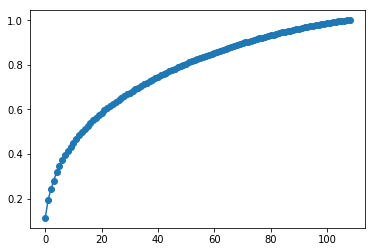

In [36]:
#  Apply PCA to see how many PCs we need
pca = PCA()
dft_pca = pca.fit_transform(dft)
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o')
plt.show()

Common in RNA data there is not clear cut point to how many PCs we need for optimal variance explained with fewest components

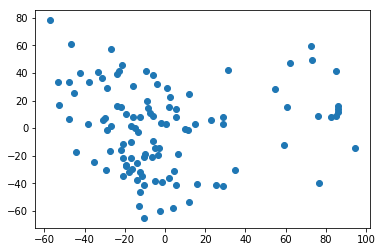

In [37]:
# Now lets examine relaitionship between first PCs and if any clusters pop out
plt.scatter(dft_pca[:, 0], dft_pca[:, 1])
plt.show()

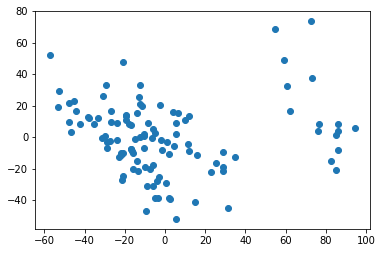

In [38]:
plt.scatter(dft_pca[:, 0], dft_pca[:, 2])
plt.show()

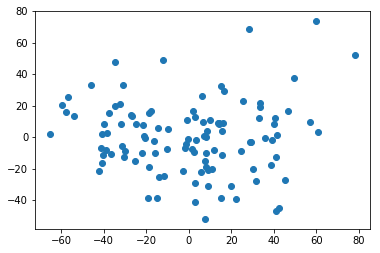

In [39]:
plt.scatter(dft_pca[:, 1], dft_pca[:, 2])
plt.show()

In [9]:
#  After some exploration, about 30 PCs (down from 109) explains about 60% of the variance while reducing the 
#  number of features to almost a quarter. After much playing around with possible choices we choose 30 PCs
pca = PCA(n_components=30)
dft_pca = pca.fit_transform(dft)

In [10]:
#  Now we seek to optimize number of clusters so we will look at 2 to 20 clusters and use inertia for the elbow method
#  and silhouette scores to optimize k
silhouette_scores = []
inertia_scores = []
K = range(2,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=1)
    kmean.fit(dft_pca)
    cluster = kmean.predict(dft_pca)
    silhouette_scores.append(silhouette_score(dft_pca, cluster))
    inertia_scores.append(kmean.inertia_ )

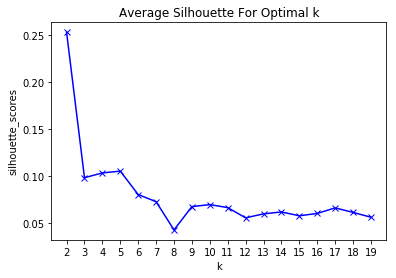

In [62]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('silhouette_scores')
plt.title('Average Silhouette For Optimal k')
plt.show()

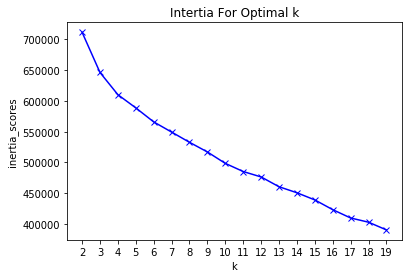

In [63]:
plt.plot(K, inertia_scores, 'bx-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('inertia_scores')
plt.title('Intertia For Optimal k')
plt.show()

In [66]:
#  No clear optimal choice for k stands out. No elbow is apparent and two clusters has the best silhouette score 
#  (the first few PCs may also suggest two clusters). However, k=5 has the second best silhouette score and 
#  reduced inertia. The question also suggests we want more than 2 clusters so this is the choice we will go with

# Create final clusters, we assign random_state to make results exactly reproducable
kmean = KMeans(n_clusters=5, random_state=1)
kmean.fit(dft_pca)

cluster = kmean.predict(dft_pca)
unique, counts = np.unique(cluster, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 31]
 [ 1 22]
 [ 2 41]
 [ 3  1]
 [ 4 14]]


### Answer 3:

It appears that there could potentially be 5 clusters on tumor cells in this data. Depending on the run, the number in each varies (the 1 is suspicious). However, since in the next asks to collapse the smaller clusters, we can accept this. 

Overall, I believe my approach to use log(x+1) transformed tumor cell rna expression is the right first step. Secondly, using PCA to do dimension reduction is a sound approach and is familiar to my skill set, as apposed to UMAP or NMF. Third, the choice of how many PCs to use in the analysis is unclear. The cumulative variance explained plot appears correct from what I've online but it limitations are immediate, there is no clear cut point on how many PCs to use and PCs are slow to explain variance. I opt for fewer PCs at the expense of less variance explained; I feel it important to reduce the number of features used in clustering (or most analyses) as too many features can make modelling too complex or spread the data out too thin. Foruth, with the number of PCs choosen, we need to find optimal number of clusters. I utilized silhouette scores and the 'elbow method' to see if there is a clear choice. Unfortunately, no number stands out. The 'eblow' method does not yield an elbow and silhouette scores are a bit messy. Since I doubt we are only interested in two clusters (potenitally the optimal choice via silhouette scores), we can choose 5 clusters to detect.

### Question 4:
Using the clusters identified in question 3, plot the Kaplan-Meier overall survival curve for
these groups.

In [71]:
from lifelines import KaplanMeierFitter

In [72]:
dfm = pd.read_csv('cancer_metadata.csv', index_col=0)
dfm.head()

,stage,age_at_diagnosis_days,race,ethnicity,vital_status,overall_survival_days
id,,,,,,
normal_1,NaN,20863,white,not hispanic or latino,Alive,NaN
tumor_1,Stage_II,20863,white,not hispanic or latino,Alive,NaN
normal_2,NaN,29104,white,not hispanic or latino,Alive,NaN
tumor_2,Stage_II,29104,white,not hispanic or latino,Alive,NaN
tumor_3,Stage_II,13836,white,not hispanic or latino,Alive,NaN


In [73]:
#  The normal and tumor rows contain the same information for given person so we can subset to just tumor cells
dfmt = dfm.loc[[s for s in dfm.index if 'tumor' in s]]
dfmt.head()

,stage,age_at_diagnosis_days,race,ethnicity,vital_status,overall_survival_days
id,,,,,,
tumor_1,Stage_II,20863,white,not hispanic or latino,Alive,NaN
tumor_2,Stage_II,29104,white,not hispanic or latino,Alive,NaN
tumor_3,Stage_II,13836,white,not hispanic or latino,Alive,NaN
tumor_4,Stage_II,20570,white,not hispanic or latino,Alive,NaN
tumor_5,Stage_I,23294,white,not hispanic or latino,Alive,NaN


In [74]:
#  Lets attach cluster assignment to the data, for clarifty we can combine 2,3, and 4 together. This will give clusters about
#  equal sizes as well
dfmt['cluster'] = cluster
dfmt = dfmt.replace([3, 4], [1, 1])
dfmt.head()

,stage,age_at_diagnosis_days,race,ethnicity,vital_status,overall_survival_days,cluster
id,,,,,,,
tumor_1,Stage_II,20863,white,not hispanic or latino,Alive,NaN,1
tumor_2,Stage_II,29104,white,not hispanic or latino,Alive,NaN,1
tumor_3,Stage_II,13836,white,not hispanic or latino,Alive,NaN,1
tumor_4,Stage_II,20570,white,not hispanic or latino,Alive,NaN,2
tumor_5,Stage_I,23294,white,not hispanic or latino,Alive,NaN,1


In [75]:
#  For KM curve we need an indicator for censored (not observed) death or lack there of
#  We also need to replace the NaNs with the time at which they were cencored. Bc we don't know the length of the study
#  we impute with the maximum time to death which will give effectively the same KM curve
dfmt['observed'] = True
dfmt.loc[dfmt['overall_survival_days'].isnull(), 'observed'] = False
dfmt = dfmt.fillna(dfmt['overall_survival_days'].max())
dfmt.head()

,stage,age_at_diagnosis_days,race,ethnicity,vital_status,overall_survival_days,cluster,observed
id,,,,,,,,
tumor_1,Stage_II,20863,white,not hispanic or latino,Alive,3959.0,1,False
tumor_2,Stage_II,29104,white,not hispanic or latino,Alive,3959.0,1,False
tumor_3,Stage_II,13836,white,not hispanic or latino,Alive,3959.0,1,False
tumor_4,Stage_II,20570,white,not hispanic or latino,Alive,3959.0,2,False
tumor_5,Stage_I,23294,white,not hispanic or latino,Alive,3959.0,1,False


In [76]:
kmf = KaplanMeierFitter()
T0 = dfmt[dfmt['cluster'] == 0]['overall_survival_days']
C0 = dfmt[dfmt['cluster'] == 0]['observed']
T1 = dfmt[dfmt['cluster'] == 1]['overall_survival_days']
C1 = dfmt[dfmt['cluster'] == 1]['observed']
T2 = dfmt[dfmt['cluster'] == 2]['overall_survival_days']
C2 = dfmt[dfmt['cluster'] == 2]['observed']

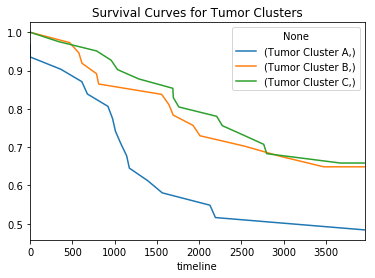

In [77]:
ax = plt.subplot(111)

kmf.fit(T0, event_observed=C0, label=['Tumor Cluster A'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T1, event_observed=C1, label=['Tumor Cluster B'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Tumor Cluster C'])
kmf.survival_function_.plot(ax=ax)

plt.title('Survival Curves for Tumor Clusters')

kmf2 = plt.gcf()

In [85]:
races1, counts1 = np.unique(dfmt[dfmt['cluster'] != 0]['race'], return_counts=True)
races2, counts2 = np.unique(dfmt[dfmt['cluster'] == 0]['race'], return_counts=True)

print('Racial breakdown for those not in Cluster A: ', '\n', np.asarray((races1, counts1/counts1.sum())).T)
print('\n')
print('Racial breakdown for those in Cluster A: ',  '\n', np.asarray((races2, counts2/counts2.sum())).T)

Racial breakdown for those not in Cluster A:  
 [['black or african american' 0.038461538461538464]
 ['not reported' 0.01282051282051282]
 ['white' 0.9487179487179487]]


Racial breakdown for those in Cluster A:  
 [['black or african american' 0.06451612903225806]
 ['white' 0.9354838709677419]]


In [86]:
print('Mean age in years for those not in Cluster A: ', '\n', dfmt[dfmt['cluster'] != 0]['age_at_diagnosis_days'].mean()/365.0)
print('Mean age in years for those in Cluster A: ', '\n', dfmt[dfmt['cluster'] == 0]['age_at_diagnosis_days'].mean()/365.0)

Mean age in years for those not in Cluster A:  
 57.02216368106779
Mean age in years for those in Cluster A:  
 59.338311975254086


### Answer 4:

As mentioned previously, we collapse the three smallest of the five clusters into one group to plot the survival curves. This gives each of the three remaining groups about equal sample size, which is nice. It is immediate that Cluster A has a much different survival curve; it is steeper and by the end individuals more likely to die. Clusters B and C have near identical curves. A quick look at demographisc doesn't show much of a difference between the groups but perhaps worth noting; those in Cluster A are more likely to be black/african american and are diagnnosed about two years than those not in Clusters B and C.